# ✅ 최종 모델 돌리기

**💗최종 모델 돌리는 곳**
<br/><br/>

생성한 Feature 데이터들을 가져와 모델에 학습시킨다.


---



**[목차 설명]**
0. 준비과정
    - features.csv파일 pd.read_csv 로 가져옴 -> 모델링에 사용할 데이터
1. 모델링
2. 평가


---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### .0.준비과정

#### ◼Data Load


##### features.csv 파일

#### ◼import library

In [ ]:
import pandas as pd
import numpy as np
import os
import sys

# librosa is a Python library for analyzing audio and music.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint

import wave
import pylab
from pathlib import Path
from scipy import signal
from scipy.io import wavfile
from sklearn.metrics import confusion_matrix
import itertools
import pylab

import matplotlib.pyplot as plt
import math

In [ ]:
featurecsv = "/content/drive/MyDrive/AI-CT/features.csv"
Features = pd.read_csv(featurecsv)

### Data Preparation
As of now we have extracted the data, now we need to normalize and split our data for training and testing.


In [ ]:
X = Features.iloc[: ,:-1].values #데이터 특징 값들
Y = Features['labels'].values #감정(Emotion)

In [ ]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
X.shape, Y.shape #총 개 데이터 ( 102972 = 34324 * 3)
# X의 컬럼개수 개(특징들)
# Y의 컬럼개수 10개 (감정 10개중에 정답감정이 1로 설정됨)

((102972, 162), (102972, 10))

In [ ]:
# splitting data : train데이터, test데이터 나눔
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((77229, 162), (77229, 10), (25743, 162), (25743, 10))

In [ ]:
# y_test(정답파일) csv로 저장
#df = pd.DataFrame(y_test) 
#df.to_csv('answer.csv', index=False)

In [ ]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((77229, 162), (77229, 10), (25743, 162), (25743, 10))

In [ ]:
# making our data compatible to model. # 데이터의 차원 모델에 맞게 통일 
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((77229, 162, 1), (77229, 10), (25743, 162, 1), (25743, 10))

### Modeling

1. Convo layer + dense

In [ ]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 162, 256)          1536      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 81, 256)          0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 81, 256)           327936    
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 41, 256)          0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 41, 128)           163968    
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 21, 128)         

2. LSTM + dense

In [ ]:
# model=Sequential()
# model.add(keras.layers.LSTM(128, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
# model.add(keras.layers.LSTM(128))
# model.add(Dense(units=32, activation='relu'))
# model.add(Dropout(0.3))

# model.add(Dense(units=7, activation='softmax'))
# model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

# model.summary()

In [ ]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
1207/1207 [==============================] - 383s 314ms/step - loss: 1.5230 - accuracy: 0.4548 - val_loss: 1.3051 - val_accuracy: 0.5058 - lr: 0.0010
Epoch 2/50
1207/1207 [==============================] - 369s 305ms/step - loss: 1.3181 - accuracy: 0.5003 - val_loss: 1.2137 - val_accuracy: 0.5369 - lr: 0.0010
Epoch 3/50
1207/1207 [==============================] - 366s 303ms/step - loss: 1.2621 - accuracy: 0.5172 - val_loss: 1.1882 - val_accuracy: 0.5462 - lr: 0.0010
Epoch 4/50
1207/1207 [==============================] - 364s 302ms/step - loss: 1.2257 - accuracy: 0.5335 - val_loss: 1.1575 - val_accuracy: 0.5516 - lr: 0.0010
Epoch 5/50
1207/1207 [==============================] - 371s 308ms/step - loss: 1.2004 - accuracy: 0.5420 - val_loss: 1.1226 - val_accuracy: 0.5674 - lr: 0.0010
Epoch 6/50
1207/1207 [==============================] - 366s 303ms/step - loss: 1.1726 - accuracy: 0.5513 - val_loss: 1.1227 - val_accuracy: 0.5746 - lr: 0.0010
Epoch 7/50
1207/1207 [============

805/805 [==============================] - 27s 33ms/step - loss: 0.9520 - accuracy: 0.6541
Accuracy of our model on test data :  65.41195511817932 %


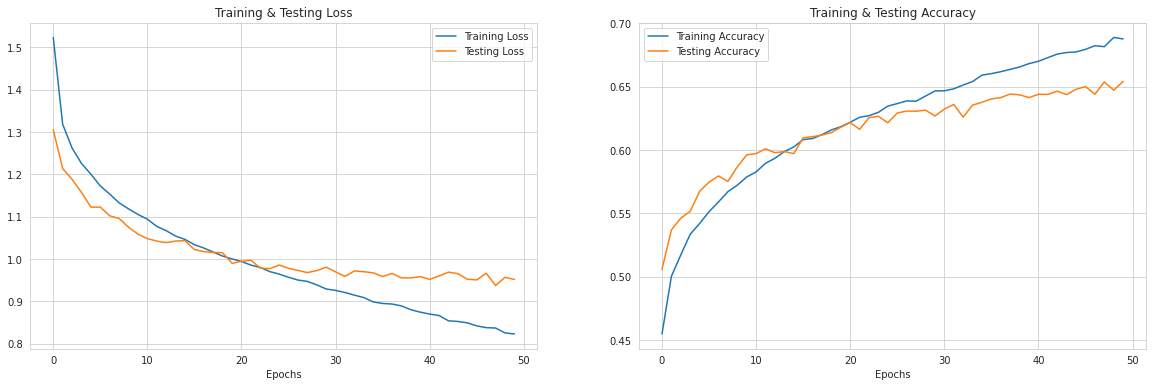

In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()


In [ ]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

In [ ]:
df = pd.DataFrame(pred_test)
df.to_csv('pred.csv', index=False)

In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,Neutral,Neutral
1,Neutral,Neutral
2,Anger,Wound
3,Happy,Anger
4,Happy,Happy
5,Neutral,Neutral
6,Fear,Fear
7,Anxiety,Embarrassed
8,Disgust,Happy
9,Sad,Sad


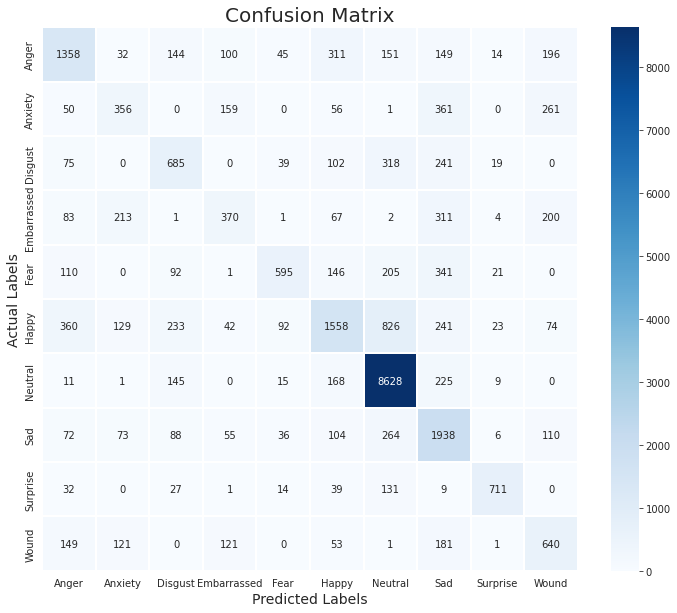

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       Anger       0.59      0.54      0.57      2500
     Anxiety       0.38      0.29      0.33      1244
     Disgust       0.48      0.46      0.47      1479
 Embarrassed       0.44      0.30      0.35      1252
        Fear       0.71      0.39      0.51      1511
       Happy       0.60      0.44      0.50      3578
     Neutral       0.82      0.94      0.87      9202
         Sad       0.48      0.71      0.57      2746
    Surprise       0.88      0.74      0.80       964
       Wound       0.43      0.51      0.47      1267

    accuracy                           0.65     25743
   macro avg       0.58      0.53      0.54     25743
weighted avg       0.65      0.65      0.64     25743

